>  **Development of a Recommender System for Optimized Allocation of NSFAS Funding to Deserving Recipients.**

___


**Task**: `Reccomender Model on The Optimized Allocation of NSFAS Funding to Deserving Recipients.`

**Date**: `2023-10-31`

**Decription**: `In this notebook I'm going to create a binary classification model that will be able to classify weather a student is eligible for NSFAS Funding or not based on the features provided.`

**Main**: `ML Algorithims (binary classification)`

**Programming Language**: `Python`

___


### Data

The data that we are loading from this notebook comes from local files. We are going to load this data from a `csv` file that is located in the `data` folder. The folder structure in this project looks as follows:


```shell
📁 /
    📁 data
       - dataset_combined.xlsx
       - dataset_combined.csv
```

The `dataset_combined.csv` contains a lot of rows and columns that we are going to analyse before creating a classification machine learning model.


### Imports

The next thing is to import all the packages that we are going to need in this notebook. These are the major packages that we are going to need in to perform this machine learning task.


1. [`pandas`](https://pandas.pydata.org/) - We are going to use this package to read our data into dataframes.
2. [`matplotlib`](https://matplotlib.org/) - We are going to use this package for visualization.
3. [`sklearn`](https://scikit-learn.org/stable/) - scikit-learn is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support-vector machines.
4. [`numpy`](https://numpy.org/) - NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.
5. [`seaborn`](https://seaborn.pydata.org/) - Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.


In the following code cell we are goig to import all the required packages that we are going to use in this notebook, for both visualization and model creation.

In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns

import os
import time
import random
import itertools

from sklearn.metrics import precision_score, recall_score, classification_report, accuracy_score, f1_score, confusion_matrix
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn import preprocessing

from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer

print("pandas:", pd.__version__)
print("numpy:", np.__version__)

pandas: 1.5.3
numpy: 1.24.3


### SEED
Next we are going to set the seed for all random operations for reproducivity.

> Reproducivity meaning that when runing this notebook multiple times we are going to get same results (on this specific machine in this notebook).

The random operations that we might have are from the `random` module and `numpy`.

In [3]:
SEED = 23
random.seed(SEED)
np.random.seed(SEED)

### Data

In the following code cell we are going to define the path to where our `data` is located. We are going to load the data first before we clean and work with it in any way. Our data is in an `excel` spreadsheet and we are going to load it into a pandas dataframe using a method called `read_csv()` method. First things first let's define the paths to our data file.


In [4]:
BASE_DIR = './'
DATA_PATH = os.path.join(BASE_DIR, 'data/', 'dataset_combined.csv')

assert os.path.exists(DATA_PATH), f"The path '{DATA_PATH}' does not exists."

Now that we have a path to our file we are going to load the data of the file in a pandas [`DataFrame`](https://pandas.pydata.org/docs/reference/frame.html) using the [`read_csv`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) method.

In [7]:
dataframe = pd.read_csv(DATA_PATH)

The `dataframe` object has some usefull methods that we can use on it. For example we can check the first 5 rows of our data using the `head(n)` or the last 5 rows of data using the `tail(n)` method. Let's check the first `7` rows of our data.

In [8]:
dataframe.head(7)

,Name,Education Qualification,Gender,Community,Religion,Exservice-men,Disability,Sports,Annual-Percentage,Income,India,Outcome
0,INSPIRE Scholarship 2022-23 ? Scholarship for ...,Undergraduate,Male,General,Hindu,Yes,Yes,Yes,90-100,Upto 1.5L,In,eligible
1,INSPIRE Scholarship 2022-23 ? Scholarship for ...,Undergraduate,Male,General,Hindu,Yes,Yes,No,90-100,Upto 1.5L,In,eligible
2,INSPIRE Scholarship 2022-23 ? Scholarship for ...,Undergraduate,Male,General,Muslim,Yes,Yes,Yes,90-100,Upto 1.5L,In,eligible
3,INSPIRE Scholarship 2022-23 ? Scholarship for ...,Undergraduate,Male,General,Muslim,Yes,Yes,No,90-100,Upto 1.5L,In,eligible
4,INSPIRE Scholarship 2022-23 ? Scholarship for ...,Undergraduate,Male,General,Chirstian,Yes,Yes,Yes,90-100,Upto 1.5L,In,eligible
5,INSPIRE Scholarship 2022-23 ? Scholarship for ...,Undergraduate,Male,General,Chirstian,Yes,Yes,No,90-100,Upto 1.5L,In,eligible
6,INSPIRE Scholarship 2022-23 ? Scholarship for ...,Undergraduate,Male,General,Others,Yes,Yes,Yes,90-100,Upto 1.5L,In,eligible


### Data Analysis

In this section of the notebook we are going to analyse our data. First things first we are going to check the unique values of each column in our dataframe.

Let's start by checking the different scholarship names that we have in this data.


In [9]:
for i, name in enumerate(dataframe.Name.unique()):
    print(f"{i+1}. {name}")

1. INSPIRE Scholarship 2022-23 ? Scholarship for Higher Education (SHE)
2. Abdul Kalam Technology Innovation National Fellowship
3. AAI Sports Scholarship Scheme in India 2022-23
4. Glow and lovely Career Foundation Scholarship
5. National Fellowship for Persons with Disabilities
6. ONGC Sports Scholarship Scheme 2022-23
7. Pragati Scholarship ? AICTE-Scholarship Scheme to Girl Child
8. Dr. Ambedkar post matric Scholarship
9. Indira Gandhi Scholarship for Single Girl Child UGC Scholarship for PG Programmes
10. National Overseas Scholarship Scheme 2021-22


We can observe that there are `10` different scollarship names that are involved.


What about the different `Education Qualification` that we have in this dataset?



In [10]:
for i, name in enumerate(dataframe['Education Qualification'].unique()):
    print(f"{i+1}. {name}")

1. Undergraduate
2. Postgraduate
3. Doctrate


We have `3` different education qualifications that can be sponsored by `10` different qualifications. Let's visualize this by a graph.

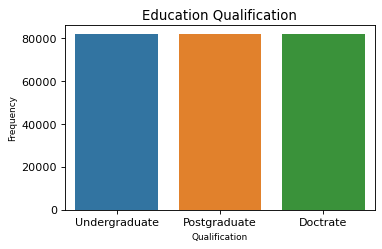

In [11]:
plt.figure(figsize=(5, 3), dpi=80)
sns.countplot(x="Education Qualification", data=dataframe)
plt.title("Education Qualification", color="k", fontsize=12)
plt.xlabel("Qualification", fontsize=8)
plt.ylabel("Frequency", fontsize=8)
plt.show()

We can see that there is an even distribution of data on the `Education Qualification`. Let's visualize the `Gender` distribution of our dataset.

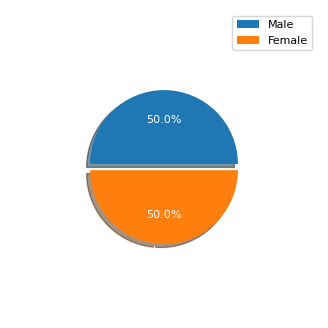

In [12]:
gender_freq = {i: 0 for i in dataframe.Gender.values}
for v in dataframe.Gender.values:
    gender_freq[v] += 1

plt.figure(figsize=(4, 4))
plt.pie(gender_freq.values(), explode= [.0, .05], labels=gender_freq.keys(),
        pctdistance=0.6, shadow=True, autopct='%1.1f%%', textprops={'color': 'white', 'fontsize':8}, radius=.6)
plt.legend(fontsize=8)
plt.show()

Our gender is evenly distributed, Let's visualize the different `communities` that were involved with their respective `religions`.

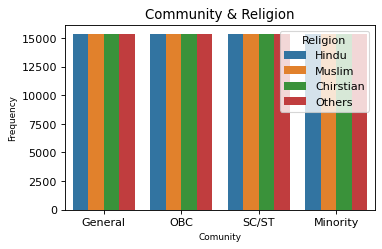

In [13]:
plt.figure(figsize=(5, 3), dpi=80)
sns.countplot(x="Community", hue="Religion", data=dataframe)
plt.title("Community & Religion", color="k", fontsize=12)
plt.xlabel("Comunity", fontsize=8)
plt.ylabel("Frequency", fontsize=8)
plt.show()

We have `4` different communities and `4` different `religions` in our dataset. Going forward with the data analysis we are going to visualize the distribution among disabled and those who are sport players in our dataset.

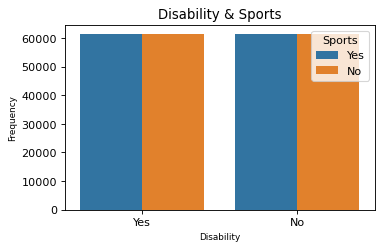

In [14]:
plt.figure(figsize=(5, 3), dpi=80)
sns.countplot(x="Disability", hue="Sports", data=dataframe)
plt.title("Disability & Sports", color="k", fontsize=12)
plt.xlabel("Disability", fontsize=8)
plt.ylabel("Frequency", fontsize=8)
plt.show()

Next we are going to visualize the relationship between `Annual-Percentage` and `Income` and how they are distributed in our dataframe.

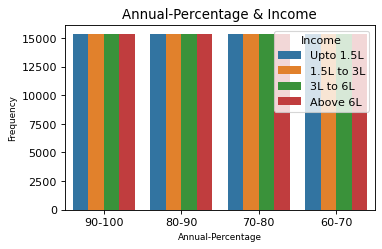

In [15]:
plt.figure(figsize=(5, 3), dpi=80)
sns.countplot(x="Annual-Percentage", hue="Income", data=dataframe)
plt.title("Annual-Percentage & Income", color="k", fontsize=12)
plt.xlabel("Annual-Percentage", fontsize=8)
plt.ylabel("Frequency", fontsize=8)
plt.show()

Let's plot a `pie` chat that shows how the `Exservice-men` column values are distributed in our dataset.

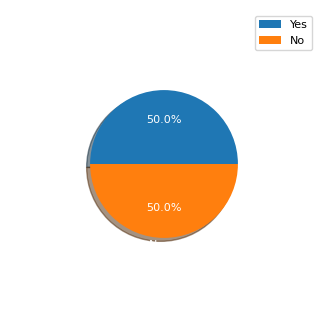

In [16]:
exservice_freq = {i: 0 for i in dataframe['Exservice-men'].values}
for v in dataframe['Exservice-men'].values:
    exservice_freq[v] += 1

plt.figure(figsize=(4, 4))
plt.pie(exservice_freq.values(), explode= [.0, .0], labels=exservice_freq.keys(),
        pctdistance=0.6, shadow=True, autopct='%1.1f%%', textprops={'color': 'white', 'fontsize':8}, radius=.6)
plt.legend(fontsize=8)
plt.show()

We can see that `50%` of these people were `Exservice-men` and `50%` were not.


Next we are going to check how many peple where inside and outside `India`

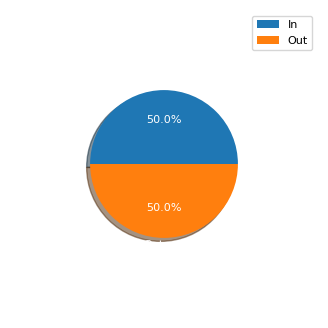

In [17]:
india_freq = {i: 0 for i in dataframe['India'].values}
for v in dataframe['India'].values:
    india_freq[v] += 1

plt.figure(figsize=(4, 4))
plt.pie(india_freq.values(), explode= [.0, .0], labels=india_freq.keys(),
        pctdistance=0.6, shadow=True, autopct='%1.1f%%', textprops={'color': 'white', 'fontsize':8}, radius=.6)
plt.legend(fontsize=8)
plt.show()

Next we are going to visualize the `Outcome`. The `Outcome` column is our final label and the values are either `eligible` or `ineligible` for funding.

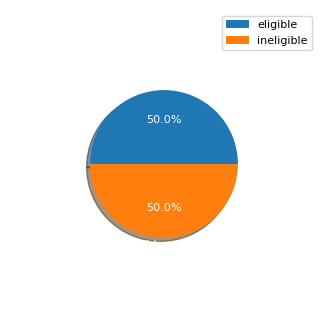

In [18]:
out_freq = {i: 0 for i in dataframe['Outcome'].values}
for v in dataframe['Outcome'].values:
    out_freq[v] += 1

plt.figure(figsize=(4, 4))
plt.pie(out_freq.values(), explode= [.0, .0], labels=out_freq.keys(),
        pctdistance=0.6, shadow=True, autopct='%1.1f%%', textprops={'color': 'white', 'fontsize':8}, radius=.6)
plt.legend(fontsize=8)
plt.show()

We can see that we have balanced labels in our datatset. `50%` of the students are not eligible for the funding and `50%` of the students are eligible for this funding. Since our dataset is balanced we can rely on binary accuracy as a good measure of the machine learning algorithim performance.

Now we can visualize the balanced dataframe using a `bar` graph as follows:

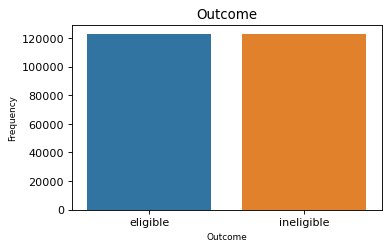

In [20]:
plt.figure(figsize=(5, 3), dpi=80)
sns.countplot(x="Outcome", data=dataframe)
plt.title("Outcome", color="k", fontsize=12)
plt.xlabel("Outcome", fontsize=8)
plt.ylabel("Frequency", fontsize=8)
plt.show()

> We are done with data analysis. It's time for us to use our logic in finding the best features to consider before creating our model. We are going to look at all the columns that we have in this data and see drop the ones that we think are not relavant in creating our classification model.


1. `Name`	- (We are not going to consider this column)
2. `Education Qualification`	- to be considered
3. `Gender`	- to be considered
4. `Community`	- to be considered
5. `Religion`	- to be considered
6. `Exservice-men` - to be considered
7. `Disability` - to be considered
8. `Sports` - to be considered
9. `Annual-Percentage` - to be considered
10. `Income`	- to be considered
12. `India`	- (this one is not important because NSFAS is based in SA not India)
13. `Outcome` - (the one we are intrested in predicting from the above features)


Next we are going to drop all the columns that are not going to be considered in the following code cell.


In [21]:
dataframe.drop(columns=['Name', 'India'], inplace=True)
dataframe.head()

,Education Qualification,Gender,Community,Religion,Exservice-men,Disability,Sports,Annual-Percentage,Income,Outcome
0,Undergraduate,Male,General,Hindu,Yes,Yes,Yes,90-100,Upto 1.5L,eligible
1,Undergraduate,Male,General,Hindu,Yes,Yes,No,90-100,Upto 1.5L,eligible
2,Undergraduate,Male,General,Muslim,Yes,Yes,Yes,90-100,Upto 1.5L,eligible
3,Undergraduate,Male,General,Muslim,Yes,Yes,No,90-100,Upto 1.5L,eligible
4,Undergraduate,Male,General,Chirstian,Yes,Yes,Yes,90-100,Upto 1.5L,eligible


I'm not happy with how the labels are distributed in this dataset. We can see that the first `5` rows contains the label `eligible`. We want to shuffle this dataframe so that we can have mixed labels. 

In [24]:
dataframe = dataframe.sample(frac=1).reset_index(drop=True)
dataframe.head()

,Education Qualification,Gender,Community,Religion,Exservice-men,Disability,Sports,Annual-Percentage,Income,Outcome
0,Undergraduate,Male,OBC,Chirstian,Yes,No,Yes,70-80,Above 6L,eligible
1,Postgraduate,Female,General,Others,Yes,Yes,No,60-70,3L to 6L,ineligible
2,Doctrate,Female,SC/ST,Others,No,Yes,No,80-90,3L to 6L,ineligible
3,Undergraduate,Male,Minority,Muslim,No,Yes,No,70-80,Above 6L,eligible
4,Doctrate,Female,General,Chirstian,No,No,No,60-70,3L to 6L,ineligible


The first thing that we should do when working with data for machine leaning is to check for `null` and `na` values using `isna()` method and `isnull()` so that we drop all those rows where the column value does not have anything in it. Let's check if we have `na` values using the `isna()` method.

In [25]:
dataframe.isna().any()

Education Qualification    False
Gender                     False
Community                  False
Religion                   False
Exservice-men              False
Disability                 False
Sports                     False
Annual-Percentage          False
Income                     False
Outcome                    False
dtype: bool

> We can be able to see that all colums does not have `na` values. If there were `na`, in that case we use the `dropna()` function on our dataframe so that we drop those columns as they might affect our machine learning algorithms/model.

In [26]:
dataframe.dropna(inplace=True)

The same applies when checking if we have `null` values.

In [27]:
dataframe.isnull().any()

Education Qualification    False
Gender                     False
Community                  False
Religion                   False
Exservice-men              False
Disability                 False
Sports                     False
Annual-Percentage          False
Income                     False
Outcome                    False
dtype: bool

> From the count plot we can see that the data is **balanced**, which means when evaluating our model using the classification accuracy we can get reasonable results. However we are also going to measure our model performance with other metrics that give us better insights such as:

1. Confusion Matrix
2. Precision
3. Recall
5. F1 Score


### Model Selection and Building
In this section we are going to have a look on how we can build a model that will do the nsfas recommentation model given some certain variables. We are going to:

1. Spliting the sets (train and test)
2. Extract features and labels
3. Scales the features
4. Model Selection
5. Hyper Params Tuning


### Spliting the sets
First thing first we need to split our data into two sets:

1. `train`
2. `test`

For that we are going to take a faction of `20%` of the whole dataset and give it to the `test` data. I will specify the `random_state` to be the `SEED` for reproducivity on the spliting of these sets. We are going to use a method from `mode_selection` called `train_test_split`




In [28]:
train, test = train_test_split(
    dataframe, test_size=0.2, random_state=SEED
)

Now we can visualize using bar graph how many examples do we have in each `set`. 

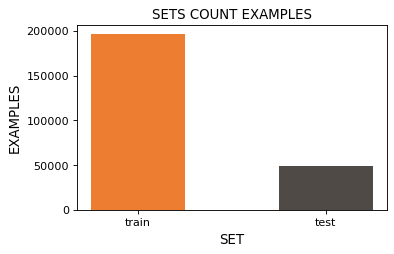

In [29]:
xs = np.array(['train', 'test'])
plt.figure(figsize=(5, 3), dpi=80)
plt.bar(xs, [len(train), len(test)], label=xs, width=.5,
        color=['#ED7D31', '#4F4A45'], 
        align="center"
)
plt.title("SETS COUNT EXAMPLES", color="k", fontsize=12)
plt.xlabel("SET", fontsize=12)
plt.ylabel("EXAMPLES", fontsize=12)
plt.show()

### Why are we splitting sets?
We are splitting our data into two sets which are the train and evaluation set. The reason we are spliting our data into train and test is that we want to train a model using the training data and evaluate the model using the data it haven't seen during it's train which is the test set. So during the training of the model, the model should not have any idea of how our test data so that during evaluation our model will be able to give us reliable matrics. And if we are happy with the metrics which means we have a good chance that the model will perform very well during inference/in production.


### Extract features and labels.

Next we are going to get the train features and labels as well as the test features and labels. Our features and labels are inform of text. However,  machine learning algorithims understand numbers. We need a way of converting these features and labels into numbers. There are many ways of doing this but in this case i will use the simple one. First i will use the get my labels and use the `LabelEncoder` to change these labels to numbers.

In [30]:
train_features = train.drop(["Outcome"],axis=1)
train_labels = train["Outcome"].values

test_features = test.drop(["Outcome"],axis=1)
test_labels = test["Outcome"].values

Next we are going to `fit` our train labels to the `label` encoder.

In [31]:
label_encoder = LabelEncoder()
label_encoder.fit(train_labels)

LabelEncoder()

Finally we are going to transform our labels to numerical values using the `transform` method.

In [32]:
train_labels_transformed = label_encoder.transform(train_labels)
test_labels_transformed = label_encoder.transform(test_labels)

And we are going to check the first `5` labels in our `test` data.

In [33]:
test_labels_transformed[:5]

array([0, 1, 0, 1, 1])


### Scaling and Encoding  features

Our features need to be encoded from `text` to numbers for that i will use the `OrdinalEncoder`. So we are going to create a pipeline that will work on tranforming our data in the way that we want. We are going to use something called [`ColumnTransformer`](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html) from `sklearn`. We are going to encode each column surperately and scale the features in a pipeline. Here are the transformations that we are going to make for our features.

1. Education Qualification	- [`OrdinalEncoder()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html) -> [`StandardScaler()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
2. Gender	- [`OrdinalEncoder()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html) -> [`StandardScaler()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
3. Community	- [`OrdinalEncoder()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html) -> [`StandardScaler()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
4. Religion	- [`OrdinalEncoder()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html) -> [`StandardScaler()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
5. Exservice-men	- [`OrdinalEncoder()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html) -> [`StandardScaler()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
6. Disability	- [`OrdinalEncoder()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html) -> [`StandardScaler()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
7. Sports	- [`OrdinalEncoder()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html) -> [`StandardScaler()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
8. Annual-Percentage	- [`OrdinalEncoder()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html) -> [`StandardScaler()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
9. Income	- [`OrdinalEncoder()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html) -> [`StandardScaler()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

These transformers are going to be applied on our `dataframe`. 

> When calling the `fit` method on the column transformer we are going to use the `train` data.

In [34]:
feature_columns = train.columns[:-1]
feature_columns

Index(['Education Qualification', 'Gender', 'Community', 'Religion',
       'Exservice-men', 'Disability', 'Sports', 'Annual-Percentage', 'Income'],
      dtype='object')

In [35]:
encode_scale_pipeline = Pipeline([
  ('ordinal_encoder', OrdinalEncoder()),
  ('standard_scaler', StandardScaler())
])
ct = ColumnTransformer([
        ("pre-processing", encode_scale_pipeline, feature_columns),
])
train_features_transformed = ct.fit_transform(train_features)
# on the test data we are only going to transform it
test_features_transformed = ct.transform(test_features)

In [36]:
test_features_transformed.shape, train_features_transformed.shape

((49152, 9), (196608, 9))

> We can see that we have `9` features for both our train and test data. The next thing that we are going to have a look at is `model_selection`.

### Model Selection

In this section we are going to search amoung all the classification algorithim to see which one will perform better for our task. The classification algorithms that we are going to try are:

1. [`LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
2. [`DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
3. [`RandomForestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
4. [`SVC`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)
5. [`KNN`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)


In [37]:
pipeline_lr = Pipeline([('lr_classifier', LogisticRegression(random_state=SEED, max_iter=100))])
pipeline_dt = Pipeline([ ('dt_classifier', DecisionTreeClassifier(random_state=SEED))])
pipeline_rf = Pipeline([('rf_classifier', RandomForestClassifier())])
pipeline_svc = Pipeline([('sv_classifier', SVC())])
pipeline_knn = Pipeline([('knn_classifier', KNeighborsClassifier(n_neighbors=5))])

pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_svc, pipeline_knn]
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'RandomForest', 3: "SVC", 4: 'KNN'}

for pipe in pipelines:
    pipe.fit(train_features_transformed, train_labels_transformed)

> Next we are going to calculate the `cross_validation_score` among our classification models and see which classification algorithm does perform better based on our data. 

In [38]:
cv_results_accuracy = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, test_features_transformed, test_labels_transformed, cv=10 )
    cv_results_accuracy.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

Logistic Regression: 1.000000 
Decision Tree: 1.000000 
RandomForest: 1.000000 
SVC: 1.000000 
KNN: 1.000000 


 As we can see that all our algorithim are able to learn these features and achived  `cv_score` of `100%`. We can choose `1` algorithim that we will use in this case i will chose `SVC` and build the best classifier.

In [40]:
model = SVC()
model.fit(train_features_transformed, train_labels_transformed)

SVC()

### Evaluating model

Next we are going to evaluate our model.

In [41]:
model.score(train_features_transformed, train_labels_transformed)

1.0

> Our model was able to get a reasonale accuracy of `100%` on the `train_dataset` 

In [42]:
model.score(test_features_transformed, test_labels_transformed)

1.0

> Our model was able to get a reasonale accuracy of `100%` on the `test_dataset` 

### Classifier Performance
In this section we are going to have a look on how well our classifier model will be performing interms of the following metrics.

1. Confusion Matrix
2. Precision
3. Recall
4. F1 Score


### F1 Score
* F1 score is a machine learning evaluation metric that measures a model's accuracy. It combines the precision and recall scores of a model. The accuracy metric computes how many times a model made a correct prediction across the entire dataset.

First let's make predictions for all our 2 sets, train and test.

In [43]:
# predicted labels
train_preds = model.predict(train_features_transformed)
test_preds = model.predict(test_features_transformed)

# real labels
y_train = train_labels_transformed
y_test = test_labels_transformed

We can check the first `10` predicted labels as follows.

In [44]:
train_preds[:10]

array([1, 1, 1, 0, 1, 0, 1, 1, 0, 1])

We can also check the first `10` real labels from the train set as follows:

In [45]:
y_train[:10]

array([1, 1, 1, 0, 1, 0, 1, 1, 0, 1])

Now we can calculate the `f1_scores` for each label in from the `train` set as follows:

In [46]:
score = f1_score(y_train, train_preds, labels=np.array([0, 1]), average=None)
score

array([1., 1.])

In [47]:
label_encoder.classes_

array(['eligible', 'ineligible'], dtype=object)

From the above scores shows us that the model is able to predict the labels with the following accuracies per each label.

* `0 (eligible) - 100%`
* `1 (ineligible) - 100%`

In the `train` data.

Next we are going to calculate the `f1_scores` for each label in from the `test` set as follows:

In [48]:
score = f1_score(y_test, test_preds, labels=np.array([0, 1 ]), average=None)
score

array([1., 1.])

From the above scores shows us that the model is able to predict the labels with the following accuracies per each label.


* `0 (eligible) - 100%`
* `1 (ineligible) - 100%`

In the `test` data.

### Confusion Matrix

Next we are going to plot the confusion matrix and visually see how well our model is performing in predicting load shedding impact given some features and how confused it is between these different classes. First i'm going to create a function that allows us to plot the confusion matrix in a nice way which will be called `plot_confusion_matrix()`

In [49]:
def plot_confusion_matrix(
    y_true:list, y_pred:list, 
    classes:list=[], 
    figsize:tuple=(5, 5), 
    fontsize:int=20,
    title:str="Confusion Matrix",
    xlabel:str="Predicted label",
    ylabel:str="True label",
    ):
    assert len(y_true) == len(y_pred), f"The length of predicted and real labels must be equal, received {len(y_pred)} and {len(y_true)}."
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
    n_classes = cm.shape[0]

    fig, ax = plt.subplots(figsize=figsize)
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)

    if len(classes):
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

    ax.set(
         title=title,
         xlabel=xlabel,
         ylabel=ylabel,
         xticks=np.arange(n_classes),
         yticks=np.arange(n_classes),
         xticklabels=labels,
         yticklabels=labels,
          )
    ax.yaxis.label.set_color('green')
    ax.xaxis.label.set_color('red')


    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    threshold = (cm.max() + cm.min()) / 2.
    # Plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
                 horizontalalignment="center",
                 color="white" if cm[i, j] > threshold else "black",
                 size=fontsize)
    plt.show()

First let's plot the confusion matrix from after evaluating our model on the `train` data.

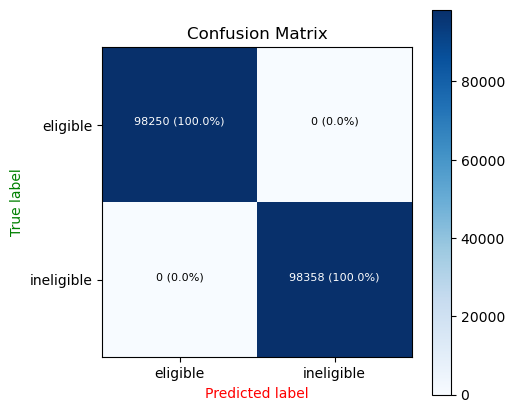

In [50]:
plot_confusion_matrix(
    y_train, train_preds, label_encoder.classes_, 
    fontsize=8, figsize=(5, 5), 
)

From the above confusion matrix we can be able to see that our model is performing well on the train data in classifying the eligibility of student to qualify for funding. Our algorithm is able to learn features correctly by classifying `~98K` examples to belong to their respective classes with an accuracy of `100%`


> Let's plot the confucion matrix for our test data.

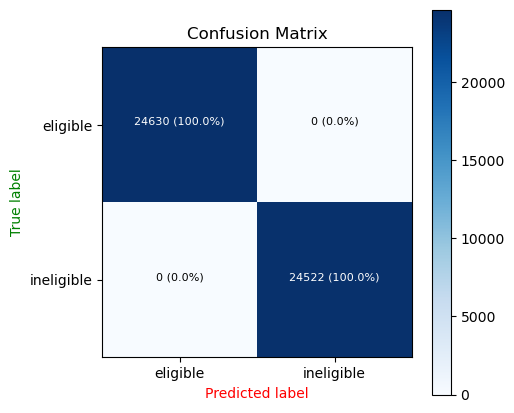

In [52]:
plot_confusion_matrix(
    y_test, test_preds, label_encoder.classes_, 
    fontsize=8, figsize=(5, 5), 
)

From the above confusion matrix we can be able to see that our model is performing well on the test data in classifying eligibility of students to qualify for funding. The summary of the confusion matrix is as follows:

* `~24K` examples were classified as `eligible` and they belong to this class.
* `~24K` examples were classified as `ineligible` and they belong to this class.
* None of these two classes was mispredicted.



### Precision Score

Precision score measures the proportion of positively predicted labels that are actually correct. Precision is also known as the positive predictive value. Let's check the precision score of our model based on our examples in each set.

In the train set the precision score are as follows:

In [53]:
precision = precision_score(y_train, train_preds, labels=np.array([0, 1], dtype=np.float32), average=None)
precision

array([1., 1.])

From the above scores shows us that the model  has the following positive predicted value on each class.

* `0 (eligible) - 100%`
* `1 (ineligible) - 100%`

In the `train` data.


How about in the test data?

In [54]:
precision = precision_score(y_test, test_preds, labels=np.array([0, 1], dtype=np.float32), average=None)
precision

array([1., 1.])

From the above scores shows us that the model  has the following positive predicted value on each class.

* `0 (eligible) - 100%`
* `1 (ineligible) - 100%`

In the `train` data.


### Accuracy Score
Though this is not a good measure of how our model is performing when unbalanced examples for each label. However in our dataset our examples have labels that are close to balanced and we can use this metric to measure the model performance. The accuracy score can be caluculated as follows:

In [55]:
train_accuracy = accuracy_score(y_train, train_preds)
train_accuracy

1.0

Our model was able to achive an accuracy of `100%` on the train examples. Which shows us that our model is accurate in predicting classifying eligibility of students from the train dataset.

In [56]:
test_accuracy = accuracy_score(y_test, test_preds)
test_accuracy

1.0

Our model was able to achive an accuracy of `100%` on the test examples. Which shows us that our model is accurate in predicting classifying labels from the test dataset.

### Classification Report.

The classification report visualizer displays the `precision`, `recall`, `F1`, and `support` scores for the model. Let's display the classification report for each set.

Let's print the classification report based on the train predictions.

In [57]:
cr = classification_report(y_train, train_preds, output_dict=False)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     98250
           1       1.00      1.00      1.00     98358

    accuracy                           1.00    196608
   macro avg       1.00      1.00      1.00    196608
weighted avg       1.00      1.00      1.00    196608



Let's print the classification report based on the test predictions.

In [58]:
cr = classification_report(y_test, test_preds, output_dict=False)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24630
           1       1.00      1.00      1.00     24522

    accuracy                           1.00     49152
   macro avg       1.00      1.00      1.00     49152
weighted avg       1.00      1.00      1.00     49152



### Model Inference

In this section of the notebook we are going to make use of our model in making predictions. First let's have a look at the first `10` rows of data that we have in our dataframe.

In [60]:
dataframe.head(10)

,Education Qualification,Gender,Community,Religion,Exservice-men,Disability,Sports,Annual-Percentage,Income,Outcome
0,Undergraduate,Male,OBC,Chirstian,Yes,No,Yes,70-80,Above 6L,eligible
1,Postgraduate,Female,General,Others,Yes,Yes,No,60-70,3L to 6L,ineligible
2,Doctrate,Female,SC/ST,Others,No,Yes,No,80-90,3L to 6L,ineligible
3,Undergraduate,Male,Minority,Muslim,No,Yes,No,70-80,Above 6L,eligible
4,Doctrate,Female,General,Chirstian,No,No,No,60-70,3L to 6L,ineligible
5,Doctrate,Male,General,Hindu,Yes,No,Yes,70-80,3L to 6L,eligible
6,Doctrate,Female,OBC,Hindu,Yes,No,Yes,80-90,3L to 6L,ineligible
7,Undergraduate,Male,OBC,Hindu,No,Yes,No,90-100,Upto 1.5L,eligible
8,Postgraduate,Female,General,Chirstian,Yes,No,Yes,60-70,Above 6L,ineligible
9,Postgraduate,Male,OBC,Muslim,Yes,Yes,No,80-90,Upto 1.5L,eligible


When predicting the eligibility coutcome we are going to do the following:
    
1. use the column transformer to transform our features. The column transformer that we are going to use is the one that we used during creation of the model.
2. call the `predict_outcome` method that will returns the prediction in `dictionary` form.
3. the `predict_outcome` takes in the transformed features, (x) model and the class names.

> Let's define the predict impact function.

In [67]:
def predict_outcome(x, model, classes: list):
    pred = int(model.predict(x).squeeze())
    class_ = classes[pred]
    return{
        'label': pred,
        'outcome': class_
    }

Let's get the features of each impact and convert them to a pandas dataframe.

In [68]:
eligible = dataframe.loc[0]
ineligible = dataframe.loc[1]

eligible = pd.DataFrame([eligible[:-1].values], columns=eligible[:-1].keys())
ineligible = pd.DataFrame([ineligible[:-1].values], columns=ineligible[:-1].keys())

Let's transform our features per each impact.

In [69]:
ineligible = ct.transform(ineligible)
eligible = ct.transform(eligible)

Let's make prediction on the `eligible` label and see if we will get it right.

In [70]:
predict_outcome(eligible, model, label_encoder.classes_)

{'label': 0, 'outcome': 'eligible'}

Let's make prediction on the `ineligible` label and see if we will get it right.

In [71]:
predict_outcome(ineligible, model, label_encoder.classes_)

{'label': 1, 'outcome': 'ineligible'}

### Saving Predictions

Now that we can see that our predictions are perfect. Let's make predictions using our `test` dataframe and save these predictions to a `csv` file called `predicted/funding_eligibility_predictions.csv`. 


In [72]:
if not os.path.exists('predicted'):
    os.mkdir('predicted')

SAVE_PATH = os.path.join('predicted', 'funding_eligibility_predictions.csv')

Let's make a column called `'Predicted Impact'` and add our predicted labels to the dataframe.

In [73]:
preds = model.predict(test_features_transformed)
pred_df = test.reset_index(drop=True)
pred_df['Predicted Outcome'] = [label_encoder.classes_[i] for i in preds]
pred_df.head(10)

,Education Qualification,Gender,Community,Religion,Exservice-men,Disability,Sports,Annual-Percentage,Income,Outcome,Predicted Outcome
0,Doctrate,Male,General,Muslim,Yes,No,No,80-90,3L to 6L,eligible,eligible
1,Postgraduate,Female,SC/ST,Muslim,No,No,No,60-70,1.5L to 3L,ineligible,ineligible
2,Postgraduate,Male,Minority,Chirstian,No,No,Yes,70-80,1.5L to 3L,eligible,eligible
3,Postgraduate,Female,OBC,Others,Yes,Yes,No,80-90,3L to 6L,ineligible,ineligible
4,Postgraduate,Female,Minority,Muslim,No,Yes,Yes,80-90,Above 6L,ineligible,ineligible
5,Doctrate,Male,SC/ST,Others,No,No,Yes,60-70,3L to 6L,eligible,eligible
6,Postgraduate,Female,SC/ST,Hindu,No,No,Yes,70-80,1.5L to 3L,ineligible,ineligible
7,Postgraduate,Male,General,Others,Yes,No,Yes,90-100,Upto 1.5L,eligible,eligible
8,Doctrate,Female,SC/ST,Others,No,Yes,No,80-90,1.5L to 3L,ineligible,ineligible
9,Undergraduate,Male,Minority,Hindu,Yes,Yes,No,60-70,1.5L to 3L,eligible,eligible


Now we can save the predictions as a `csv` file.

In [74]:
pred_df.to_csv(SAVE_PATH, index=False)
print('Saved!!')

Saved!!


### Refs

1. [`pandas`](https://pandas.pydata.org/)
2. [`matplotlib`](https://matplotlib.org/)
3. [`sklearn`](https://scikit-learn.org/stable/) 
4. [`numpy`](https://numpy.org/) 
5. [`seaborn`](https://seaborn.pydata.org/)